In [1]:
# Set up
import numpy as np
import pandas as pd
import seaborn as sns # for visualiation
import altair as alt
alt.renderers.enable('notebook') # enable altair rendering
from scipy.stats import ttest_ind # t-tests
import statsmodels.formula.api as smf # linear modeling
import statsmodels.api as sm
import matplotlib.pyplot as plt # plotting
import matplotlib
from sklearn import metrics
matplotlib.style.use('ggplot')
%matplotlib inline

In [2]:
listings_df = pd.read_csv('./data/with_amenities_and_estimated_income.csv')

/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (88) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [37]:
listings_df.columns.values
listings_df.columns.values[99:-1]

array(['Outdoor seating', 'Pets allowed', 'Pool',
       'Electric profiling bed', 'EV charger', 'Beach essentials',
       'High chair', 'Warming drawer', 'Fixed grab bars for toilet',
       'Heat lamps', 'Bed linens', 'Dishwasher', 'Breakfast', 'Hot tub',
       'Kitchenette', 'Long term stays allowed', 'Rain shower',
       'Sound system', 'Well-lit path to entrance', 'Bathtub',
       'Handheld shower head', 'Espresso machine', 'Game console',
       'Wide doorway', 'Accessible-height bed', 'Washer',
       'Single level home', 'Cleaning before checkout', 'Coffee maker',
       'Building staff', 'Hair dryer', 'Laptop friendly workspace',
       'Firm mattress', 'Projector and screen', 'Shampoo',
       'En suite bathroom', 'Smart lock', 'Shared gym',
       'Fireplace guards', 'Bathroom essentials',
       'Wide hallway clearance', 'TV',
       'translation missing: en.hosting_amenity_50',
       'Pack ’n Play/travel crib', 'Balcony', 'Dishes and silverware',
       'Washer / Drye

In [4]:
df = listings_df[['id', 'host_since', 'host_is_superhost', 'host_listings_count', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type', 'square_feet', 'Washer', 'Internet', 'TV', 'estimated_income_per_month']]

# Data Visualizations

In [5]:
df

,id,host_since,host_is_superhost,host_listings_count,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,square_feet,Washer,Internet,TV,estimated_income_per_month
0,2318,2008-08-26,t,2,House,Entire home/apt,8,2.5,4.0,4.0,Real Bed,NaN,1,1,0,789.0
1,4291,2009-09-02,f,5,House,Private room,2,1.0,1.0,1.0,Real Bed,NaN,1,1,1,1312.0
2,5682,2009-03-03,t,1,Guest suite,Entire home/apt,2,1.0,0.0,1.0,Real Bed,NaN,0,1,1,1008.0
3,6606,2009-04-26,t,4,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,NaN,0,1,1,1740.0
4,9419,2009-08-09,t,6,Apartment,Private room,2,3.0,1.0,1.0,Real Bed,200.0,1,1,0,1365.0
5,9460,2009-08-10,t,4,Condominium,Private room,2,1.0,1.0,1.0,Real Bed,NaN,1,1,1,1680.0
6,9531,2009-08-13,f,2,House,Entire home/apt,4,1.0,2.0,5.0,Real Bed,1200.0,1,1,1,1128.0
7,9534,2009-08-13,f,2,Guest suite,Entire home/apt,3,1.0,2.0,2.0,Real Bed,NaN,1,1,1,854.0
8,9596,2009-04-26,t,4,Apartment,Entire home/apt,4,1.0,1.0,6.0,Real Bed,NaN,0,1,1,1700.0
9,9909,2009-08-23,t,10,Guest suite,Entire home/apt,4,1.0,2.0,2.0,Real Bed,NaN,1,1,1,1062.0


## Does the number of accommodates really mean more income?

[(0, 20000)]

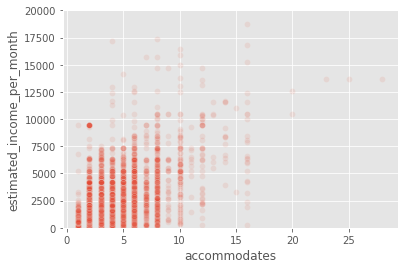

In [6]:
plot = sns.scatterplot(x="accommodates", y="estimated_income_per_month", sizes=(10, 200), alpha=0.1, data=df)
plot.set(ylim=(0,20000))

## Do homes owned by owners with many listings make more money?

The first plot shows that there are a few owners who own hundreds of AirBnbs that make a range of income per month. 

However, looking at owners with < 25 listings, it seems like owners that only own one AirBnb tend to make the most on their listing.

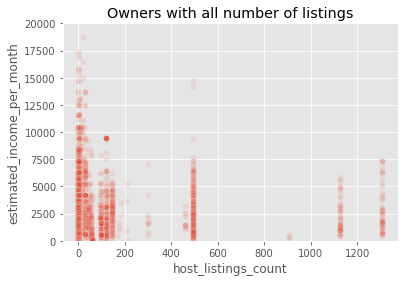

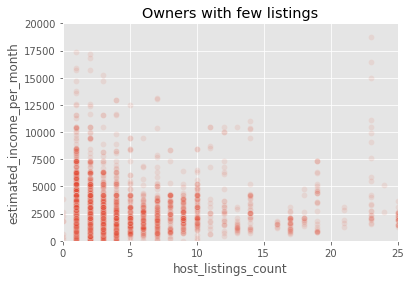

In [7]:
plot = sns.scatterplot(x="host_listings_count", y="estimated_income_per_month", sizes=(10, 200), alpha=0.1, data=df)
plot.set(ylim=(0,20000))
plot.set_title('Owners with all number of listings')
plt.show()

plot = sns.scatterplot(x="host_listings_count", y="estimated_income_per_month", sizes=(10, 200), alpha=0.1, data=df)
plot.set(ylim=(0,20000), xlim=(0,25))
plot.set_title('Owners with few listings')
plt.show()

## What ammenities increase monthly income?

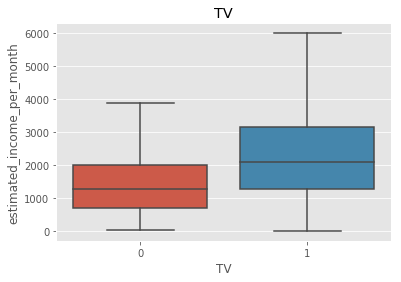

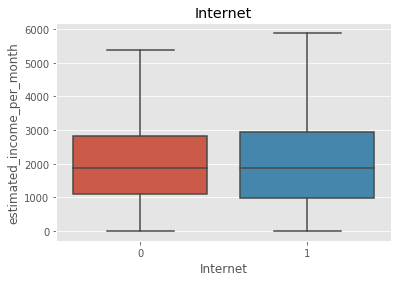

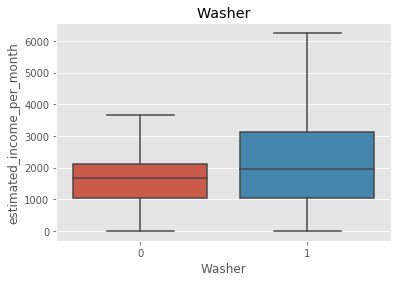

In [8]:
plot = sns.boxplot(x="TV", y="estimated_income_per_month", showfliers=False, data=df)
plot.set_title("TV")
plt.show()

plot = sns.boxplot(x="Internet", y="estimated_income_per_month", showfliers=False, data=df)
plot.set_title("Internet")
plt.show()

plot = sns.boxplot(x="Washer", y="estimated_income_per_month", showfliers=False, data=df)
plot.set_title("Washer")
plt.show()

## What about bedrooms, bathrooms, sqft?

The following plots show that bedrooms and bathrooms increase the estimated income of the home. However, the square feet plot was a bit suprising because there are spikes at 500, 600, and 1000 square feet that make the regression pretty weird.

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


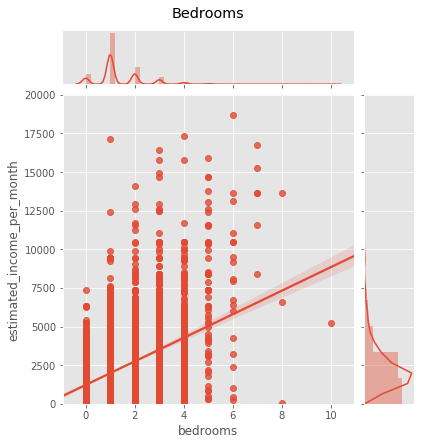

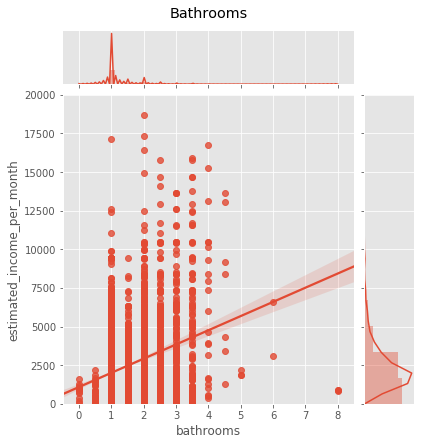

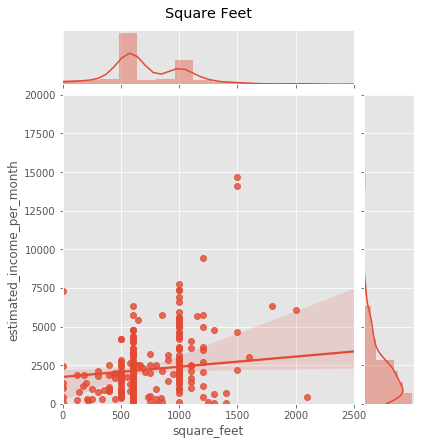

In [28]:
plot = sns.jointplot(x="bedrooms", y="estimated_income_per_month",kind="reg",ylim=(0, 20000), data=df)
plt.title('Bedrooms', y=1.23)
plt.show()

plot = sns.jointplot(x="bathrooms", y="estimated_income_per_month",kind="reg",ylim=(0, 20000), data=df)
plt.title('Bathrooms', y=1.23)
plt.show()

plot = sns.jointplot(x="square_feet", y="estimated_income_per_month",kind="reg", ylim=(0, 20000), xlim=(0,2500), data=df)
plt.title('Square Feet', y=1.23)
plt.show()